In [1]:
# Importing our data

In [2]:
from pandas import read_csv
import numpy as np

In [3]:
df=read_csv('international-airline-passengers.csv',delimiter=',',usecols=[1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [4]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
values=np.array(df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'])
values.shape # So now our data has been converted into 1D

(144,)

In [6]:
values=values.astype('float32')
values.reshape(144,1)
values.shape

(144,)

In [7]:
train_size=((values.shape[0])*2)//3
test_size=(values.shape[0])-train_size
train_size,test_size

(96, 48)

In [13]:
# Converting into a 2D array so that we can apply scaling on it
Train_data=values[0:train_size]
Train_data=Train_data.reshape(-1,1)

In [14]:
Test_data=values[train_size:]
Test_data=Test_data.reshape(-1,1)

In [18]:
# Scaling our data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Train_data=scaler.fit_transform(Train_data)
Test_data=scaler.transform(Test_data)

In [21]:
# This function is going to create us a data in which we will have the record of the last 12 months and using that we are going 
# to generate the value for the next month
def create_data(Data,window_size):
    X_Data=[]
    Y_Data=[]
    for i in range(Data.shape[0]-window_size):
        X_Data.append(Data[i:i+window_size,0])
        Y_Data.append(Data[i+window_size,0])
    return np.array(X_Data),np.array(Y_Data)
    

In [26]:
window_size=12
X_Train,Y_Train=create_data(Train_data,window_size)
X_Test,Y_Test=create_data(Test_data,window_size)

In [33]:
print(X_Train.shape,Y_Train.shape)
X_Train,Y_Train

(84, 12) (84,)


(array([[0.02588999, 0.04530746, 0.09061491, ..., 0.04854369, 0.        ,
         0.04530746],
        [0.04530746, 0.09061491, 0.08090615, ..., 0.        , 0.04530746,
         0.03559873],
        [0.09061491, 0.08090615, 0.05501619, ..., 0.04530746, 0.03559873,
         0.07119742],
        ...,
        [0.55016184, 0.43042073, 0.5631068 , ..., 1.0000001 , 0.9741101 ,
         0.8122978 ],
        [0.43042073, 0.5631068 , 0.5825243 , ..., 0.9741101 , 0.8122978 ,
         0.6537217 ],
        [0.5631068 , 0.5825243 , 0.5598706 , ..., 0.8122978 , 0.6537217 ,
         0.5404531 ]], dtype=float32),
 array([0.03559873, 0.07119742, 0.11974111, 0.10032365, 0.06796119,
        0.14563107, 0.21359226, 0.21359226, 0.17475727, 0.09385115,
        0.03236246, 0.11650488, 0.13268611, 0.14886734, 0.2394822 ,
        0.1909385 , 0.22006473, 0.2394822 , 0.3074434 , 0.3074434 ,
        0.25889972, 0.18770227, 0.13592234, 0.20064726, 0.2168285 ,
        0.24595472, 0.2880259 , 0.24919096, 0.25566342

In [34]:
# Shaping X_Train and Y_Train so that it gets feeded in the RNN unit
# Since the RNN unit requires 3D data
X_Train=X_Train.reshape(X_Train.shape[0],window_size,1)
X_Test=X_Test.reshape(X_Test.shape[0],window_size,1)

In [35]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [37]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_Train,Y_Train,epochs=100,batch_size=1)
# Loss will get reduced at every epoch due to "backpropagation through time"

Epoch 1/100
84/84 [==============================] - 0s 4ms/step - loss: 0.1073
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 13/100
84/84 [=================

In [41]:
Y_Test_Pred=model.predict(X_Test)
Y_Test_Pred=scaler.inverse_transform(Y_Test_Pred)
Y_Test_Pred=np.array(Y_Test_Pred,dtype='int32') # Since here ,output is the number of people
Y_Test_Pred

array([[349],
       [330],
       [346],
       [355],
       [353],
       [392],
       [435],
       [477],
       [453],
       [367],
       [341],
       [308],
       [365],
       [339],
       [367],
       [377],
       [377],
       [423],
       [450],
       [508],
       [468],
       [405],
       [359],
       [340],
       [396],
       [374],
       [392],
       [384],
       [427],
       [439],
       [489],
       [527],
       [498],
       [426],
       [397],
       [359]])

In [42]:
Y_Train_Pred=model.predict(X_Train)
Y_Train_Pred=scaler.inverse_transform(Y_Train_Pred)
Y_Train_Pred=np.array(Y_Train_Pred,dtype='int32') # Since here ,output is the number of people
Y_Train_Pred

array([[128],
       [121],
       [140],
       [136],
       [140],
       [127],
       [156],
       [162],
       [162],
       [140],
       [130],
       [122],
       [144],
       [143],
       [156],
       [161],
       [154],
       [168],
       [170],
       [200],
       [174],
       [173],
       [141],
       [156],
       [162],
       [171],
       [186],
       [181],
       [182],
       [182],
       [219],
       [222],
       [224],
       [181],
       [185],
       [165],
       [207],
       [185],
       [213],
       [213],
       [225],
       [230],
       [243],
       [273],
       [251],
       [219],
       [200],
       [188],
       [220],
       [202],
       [228],
       [242],
       [238],
       [255],
       [270],
       [322],
       [267],
       [248],
       [206],
       [216],
       [234],
       [231],
       [250],
       [259],
       [266],
       [286],
       [327],
       [360],
       [317],
       [284],
       [247],
      

In [48]:
Y_Train_Orignal=scaler.inverse_transform(Y_Train.reshape(-1,1))
Y_Test_Orignal=scaler.inverse_transform(Y_Test.reshape(-1,1))

In [49]:
import matplotlib.pyplot as plt 

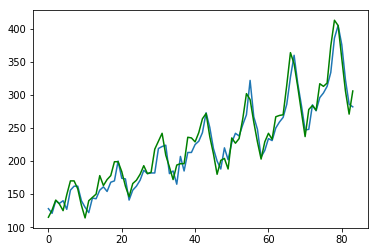

In [55]:
plt.plot(Y_Train_Pred)
plt.plot(Y_Train_Orignal,color='g')
# Here the x axis just represent the indices
# As we can see that we have quite perfectly fitted our data

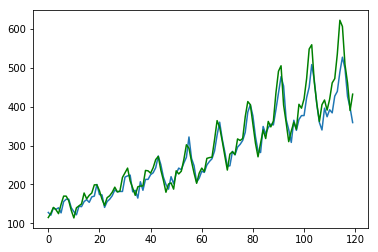

In [57]:
Combined_Pred_data=np.concatenate((Y_Train_Pred,Y_Test_Pred))
Combined_Orignal_data=np.concatenate((Y_Train_Orignal,Y_Test_Orignal))
plt.plot(Combined_Pred_data)
plt.plot(Combined_Orignal_data,color='g')
# As we can see after 84 it is following the same pattern even though the predicted peaks aint that high
# Since here we have just used 4 RNN units we can improve our accuracy using LSTM